In [12]:
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import seaborn as sns
import pandas as pd
from pandas.plotting import register_matplotlib_converters
from sklearn import metrics
register_matplotlib_converters()
plt.style.use('fivethirtyeight')
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder 
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython import display
from ipywidgets import interact, widgets
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
from IPython.display import display, HTML
sns.set()

In [13]:
games = pd.read_csv('Video_Games_Sales.csv')

In [14]:
games.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
games.shape

(16719, 16)

In [6]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [16]:
games.describe(include='all')

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
count,16717,16719,16450.000000,16717,16665,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,10015,7590.000000,10096,9950
unique,11562,31,NaN,12,581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96,NaN,1696,8
top,Need for Speed: Most Wanted,PS2,NaN,Action,Electronic Arts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tbd,NaN,Ubisoft,E
freq,12,2161,NaN,3370,1356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2425,NaN,204,3991
mean,NaN,NaN,2006.487356,NaN,NaN,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,NaN,162.229908,NaN,NaN
std,NaN,NaN,5.878995,NaN,NaN,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,NaN,561.282326,NaN,NaN
min,NaN,NaN,1980.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,NaN,4.000000,NaN,NaN
25%,NaN,NaN,2003.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,NaN,10.000000,NaN,NaN
50%,NaN,NaN,2007.000000,NaN,NaN,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,NaN,24.000000,NaN,NaN
75%,NaN,NaN,2010.000000,NaN,NaN,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,NaN,81.000000,NaN,NaN


In [17]:
gamesSales = games.loc[ :, 'Name' : 'Global_Sales'].dropna()

In [18]:
gamesSales['Year_of_Release'] = gamesSales['Year_of_Release'].astype('int')

In [19]:
gamesSales['Platform_General']= gamesSales['Platform']

#Convert console subnames to the general names
gamesSales.loc[gamesSales['Platform'] == 'PS3', 'Platform_General'] = 'Sony_Playstation' 
gamesSales.loc[gamesSales['Platform'] == 'PS', 'Platform_General'] = 'Sony_Playstation' 
gamesSales.loc[gamesSales['Platform'] == 'PS2', 'Platform_General'] = 'Sony_Playstation'
gamesSales.loc[gamesSales['Platform'] == 'PS4', 'Platform_General'] = 'Sony_Playstation'
gamesSales.loc[gamesSales['Platform'] == 'PSP', 'Platform_General'] = 'Sony_Playstation'
gamesSales.loc[gamesSales['Platform'] == 'PSV', 'Platform_General'] = 'Sony_Playstation'
gamesSales.loc[gamesSales['Platform'] == 'Wii', 'Platform_General'] = 'Nintendo'
gamesSales.loc[gamesSales['Platform'] == 'DS', 'Platform_General'] = 'Nintendo'
gamesSales.loc[gamesSales['Platform'] == 'GBA', 'Platform_General'] = 'Nintendo'
gamesSales.loc[gamesSales['Platform'] == '3DS', 'Platform_General'] = 'Nintendo'
gamesSales.loc[gamesSales['Platform'] == 'WiiU', 'Platform_General'] = 'Nintendo'
gamesSales.loc[gamesSales['Platform'] == 'NES', 'Platform_General'] = 'Nintendo'
gamesSales.loc[gamesSales['Platform'] == 'SNES', 'Platform_General'] = 'Nintendo'
gamesSales.loc[gamesSales['Platform'] == 'N64', 'Platform_General'] = 'Nintendo'
gamesSales.loc[gamesSales['Platform'] == 'GB', 'Platform_General'] = 'Nintendo'
gamesSales.loc[gamesSales['Platform'] == 'GC', 'Platform_General'] = 'Nintendo'
gamesSales.loc[gamesSales['Platform'] == 'X360', 'Platform_General'] = 'Microsoft_Xbox'
gamesSales.loc[gamesSales['Platform'] == 'XB', 'Platform_General'] = 'Microsoft_Xbox'
gamesSales.loc[gamesSales['Platform'] == 'XOne', 'Platform_General'] = 'Microsoft_Xbox'
gamesSales.loc[gamesSales['Platform'] == '2600', 'Platform_General'] = 'Atari'
gamesSales.loc[gamesSales['Platform'] == 'DC', 'Platform_General'] = 'Sega'
gamesSales.loc[gamesSales['Platform'] == 'SAT', 'Platform_General'] = 'Sega'
gamesSales.loc[gamesSales['Platform'] == 'GG', 'Platform_General'] = 'Sega'
gamesSales.loc[gamesSales['Platform'] == 'WS', 'Platform_General'] = 'Bandal'
gamesSales.loc[gamesSales['Platform'] == 'TG16', 'Platform_General'] = 'Nec'
gamesSales.loc[gamesSales['Platform'] == 'PCFX', 'Platform_General'] = 'Nec'
gamesSales.loc[gamesSales['Platform'] == '3DO', 'Platform_General'] = 'Panasonic'

# Check uniq values of Platform_General
gamesSales["Platform_General"].unique()

array(['Nintendo', 'Microsoft_Xbox', 'Sony_Playstation', 'PC', 'Atari',
       'GEN', 'Sega', 'SCD', 'Bandal', 'NG', 'Nec', 'Panasonic'],
      dtype=object)

In [43]:
gamesSales = gamesSales[(gamesSales['Platform_General'] == 'Sony_Playstation') |
                             (gamesSales['Platform_General'] == 'Microsoft_Xbox') |
                             (gamesSales['Platform_General'] == 'Nintendo')]

gamesSales['dummy_count'] = '1'
gamesSales['dummy_count'] = gamesSales['dummy_count'].astype(float)
gamesSales.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,dummy_count
count,15065.000000,15065.000000,15065.000000,15065.000000,15065.000000,15065.000000,15065.0
mean,2006.714305,0.274508,0.148970,0.082534,0.050352,0.556577,1.0
std,5.411360,0.842451,0.518839,0.323368,0.195397,1.613183,0.0
min,1983.000000,0.000000,0.000000,0.000000,0.000000,0.010000,1.0
25%,2003.000000,0.010000,0.000000,0.000000,0.000000,0.070000,1.0
50%,2007.000000,0.090000,0.020000,0.000000,0.010000,0.180000,1.0
75%,2010.000000,0.250000,0.110000,0.040000,0.040000,0.490000,1.0
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,1.0


In [44]:
gamesSales.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Platform_General,dummy_count
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,Nintendo,1.0
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,Nintendo,1.0
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,Nintendo,1.0
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,Nintendo,1.0
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,Nintendo,1.0


In [21]:
gamesSales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16416 entries, 0 to 16718
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              16416 non-null  object 
 1   Platform          16416 non-null  object 
 2   Year_of_Release   16416 non-null  int32  
 3   Genre             16416 non-null  object 
 4   Publisher         16416 non-null  object 
 5   NA_Sales          16416 non-null  float64
 6   EU_Sales          16416 non-null  float64
 7   JP_Sales          16416 non-null  float64
 8   Other_Sales       16416 non-null  float64
 9   Global_Sales      16416 non-null  float64
 10  Platform_General  16416 non-null  object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.4+ MB


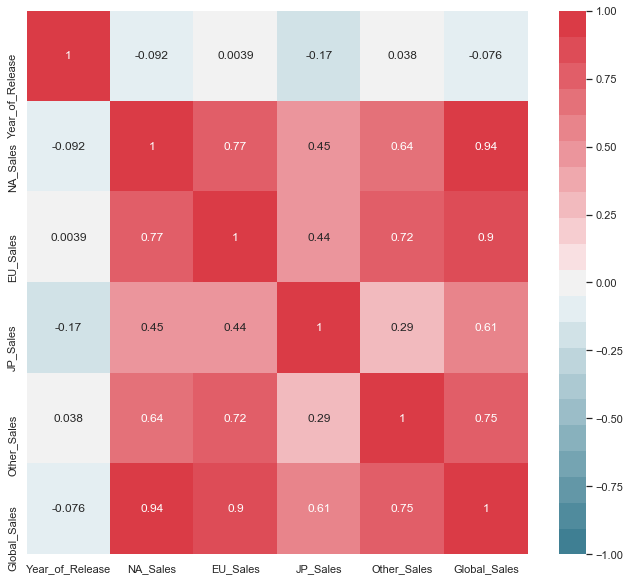

In [22]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(gamesSales.corr(),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(220, 10, n=21),
            annot=True,
            ax=ax,
           );

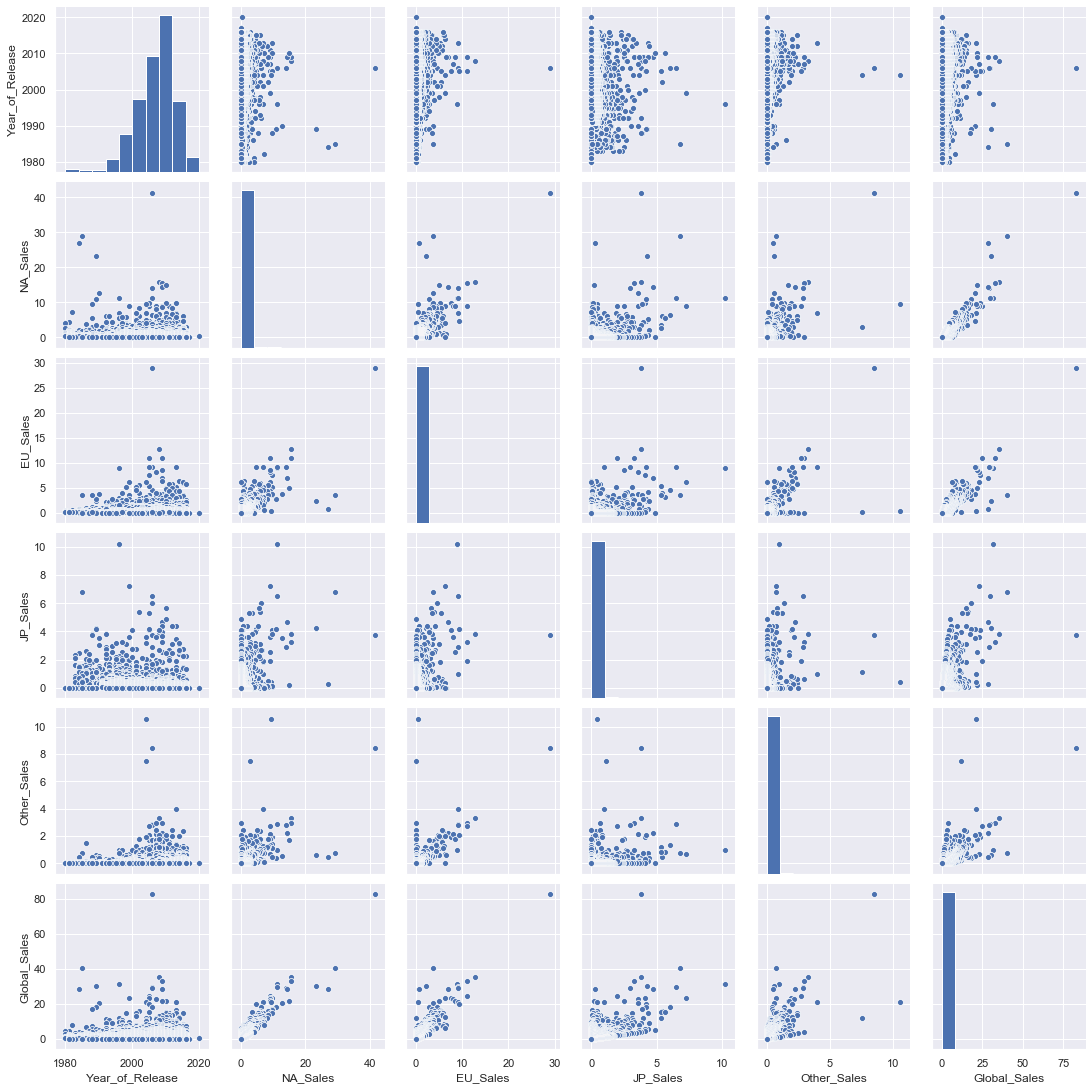

In [23]:
sns.pairplot(gamesSales);

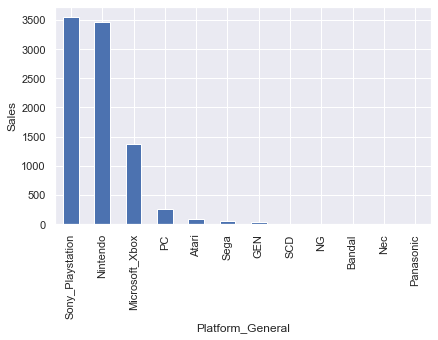

In [24]:
plt.ylabel("Sales")
gamesSales.groupby('Platform_General')['Global_Sales'].sum().sort_values(ascending=False).plot(kind='bar');

In [25]:
dupe_names = gamesSales.loc[gamesSales.loc[:, 'Name'].duplicated()].Name # defines var for duplicated names in game names 
gamesSales.loc[gamesSales.loc[:,'Name'].isin(dupe_names)] # list all games in games with same name

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Platform_General
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,Nintendo
5,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,Nintendo
16,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.02,9.09,0.98,3.96,21.04,Sony_Playstation
17,Grand Theft Auto: San Andreas,PS2,2004,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81,Sony_Playstation
18,Super Mario World,SNES,1990,Platform,Nintendo,12.78,3.75,3.54,0.55,20.61,Nintendo
...,...,...,...,...,...,...,...,...,...,...,...
16710,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,Nintendo
16713,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01,Sony_Playstation
16714,Samurai Warriors: Sanada Maru,PS3,2016,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,Sony_Playstation
16717,Spirits & Spells,GBA,2003,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,Nintendo


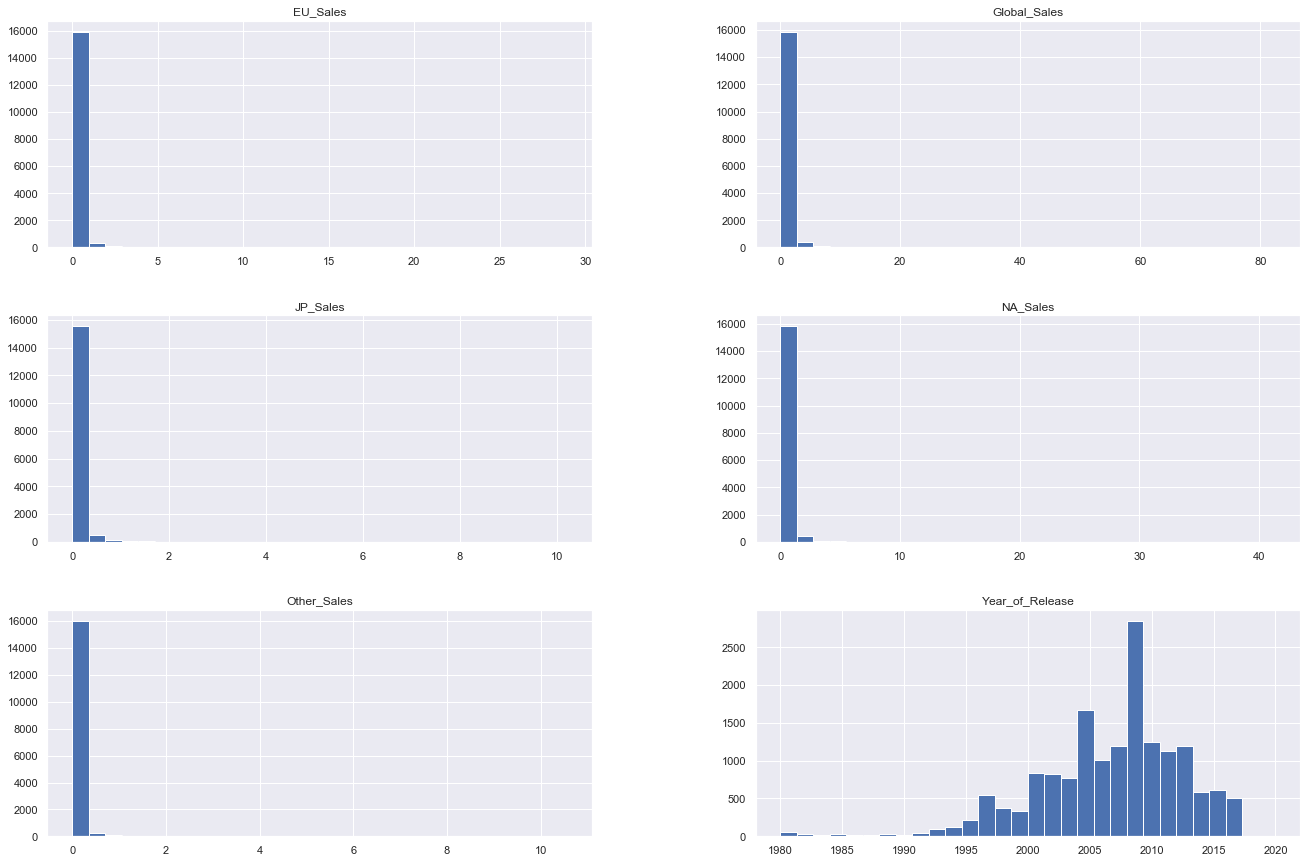

In [16]:
axis = gamesSales.hist(bins =30, figsize = (20,15));

## Number of games released by each platform per year in this data set

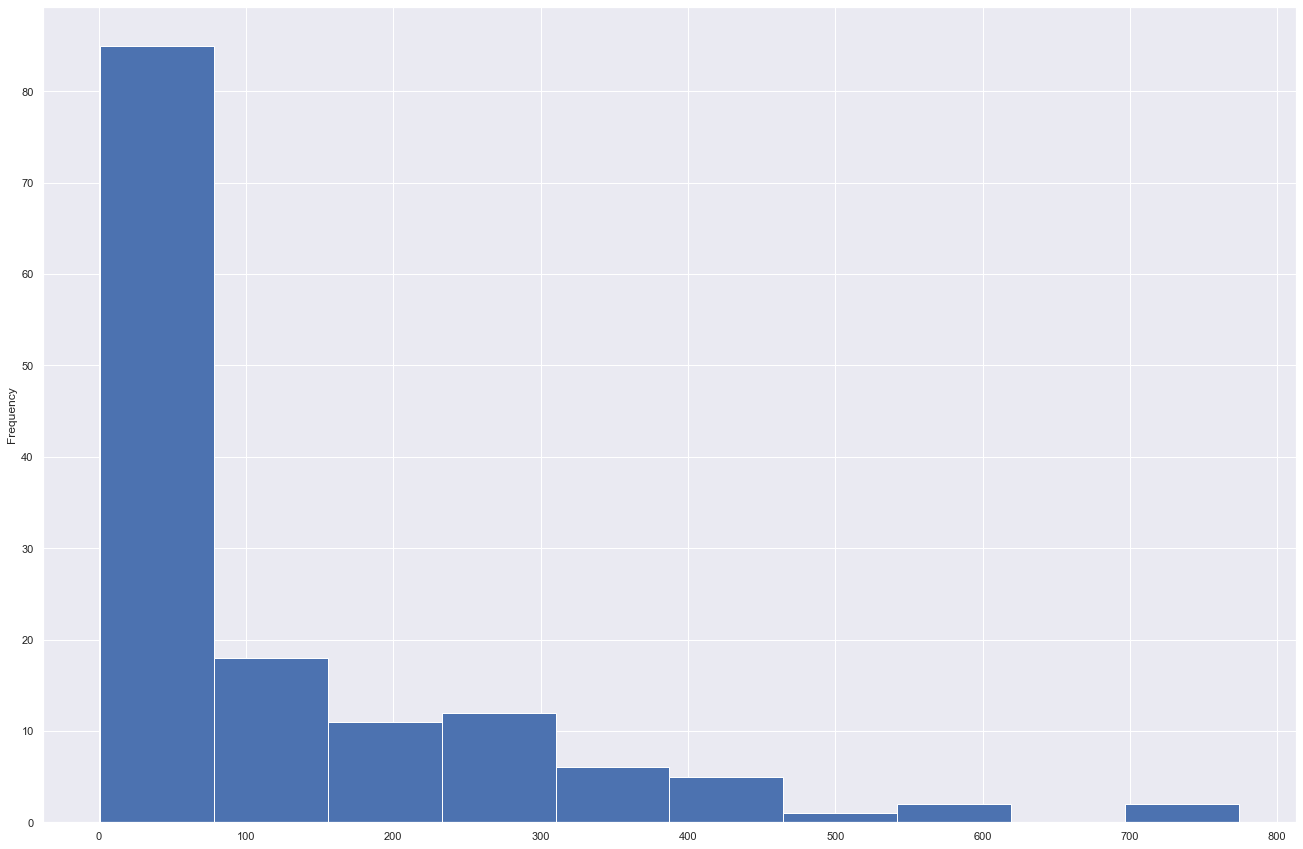

In [26]:
gamesSales.groupby('Platform_General')['Year_of_Release'].value_counts().plot(kind='hist',figsize = (20,15));      

## Total Sale per genre over the life of the data set

In [18]:
gamesSales.groupby('Genre').agg({'Global_Sales': ['sum','count'] })

Global_Sales      
                      sum count
Genre                          
Action            1717.62  3307
Adventure          233.25  1291
Fighting           442.63   837
Misc               783.19  1697
Platform           825.86   878
Puzzle             240.33   569
Racing             723.69  1225
Role-Playing       930.90  1483
Shooter           1041.83  1296
Simulation         388.22   855
Sports            1310.39  2306
Strategy           172.69   672

## Sale per platform over the life of the data set

In [27]:
gamesSales.groupby('Platform_General').agg({'Global_Sales': ['sum','count'] })

Global_Sales      
                          sum count
Platform_General                   
Atari                   86.57   116
Bandal                   1.42     6
GEN                     28.36    27
Microsoft_Xbox        1372.92  2282
NG                       1.44    12
Nec                      0.19     3
Nintendo              3462.06  6145
PC                     256.21   952
Panasonic                0.10     3
SCD                      1.87     6
Sega                    49.60   226
Sony_Playstation      3549.86  6638

## Global Game Sales per year in the data set

In [20]:
gamesSales.groupby('Year_of_Release')['Global_Sales'].sum()     

Year_of_Release
1980     11.38
1981     35.77
1982     28.86
1983     16.79
1984     50.36
1985     53.94
1986     37.07
1987     21.74
1988     47.22
1989     73.45
1990     49.39
1991     32.23
1992     76.17
1993     45.98
1994     79.18
1995     88.11
1996    199.15
1997    200.98
1998    256.45
1999    251.25
2000    201.58
2001    331.47
2002    395.51
2003    357.80
2004    413.75
2005    456.88
2006    518.22
2007    604.16
2008    671.79
2009    658.88
2010    590.43
2011    507.60
2012    355.84
2013    361.24
2014    331.51
2015    268.05
2016    130.07
2017      0.06
2020      0.29
Name: Global_Sales, dtype: float64

## Best selling game in the history of the platform per the data set

In [28]:
gamesSales.sort_values('Global_Sales', ascending=False).groupby('Platform_General').Name.first() 

Platform_General
Atari                            Pac-Man
Bandal                     Final Fantasy
GEN                 Sonic the Hedgehog 2
Microsoft_Xbox        Kinect Adventures!
NG                    Samurai Shodown II
Nec                           Doukyuusei
Nintendo                      Wii Sports
PC                            The Sims 3
Panasonic                    Policenauts
SCD                             Sonic CD
Sega                     Sonic Adventure
Sony_Playstation      Grand Theft Auto V
Name: Name, dtype: object

## Best selling game in the history by Genre per the data set

In [22]:
gamesSales.sort_values('Global_Sales', ascending=False).groupby('Genre').Name.first() 

Genre
Action                          Grand Theft Auto V
Adventure       Super Mario Land 2: 6 Golden Coins
Fighting                   Super Smash Bros. Brawl
Misc                                      Wii Play
Platform                         Super Mario Bros.
Puzzle                                      Tetris
Racing                              Mario Kart Wii
Role-Playing              Pokemon Red/Pokemon Blue
Shooter                                  Duck Hunt
Simulation                              Nintendogs
Sports                                  Wii Sports
Strategy                           Pokemon Stadium
Name: Name, dtype: object

## Best selling game in the history by Publisher per the data set

In [23]:
gamesSales.sort_values('Global_Sales', ascending=False).groupby('Publisher').Name.first() 

Publisher
10TACLE Studios                            Panzer Tactics
1C Company                      Men of War: Assault Squad
20th Century Fox Video Games                        Alien
2D Boy                                       World of Goo
3DO                                           Army Men 3D
                                          ...            
id Software                                          Doom
imageepoch Inc.                             Toushin Toshi
inXile Entertainment                          Wasteland 2
mixi, Inc                              Monster Strike 3DS
responDESIGN                             Yourself Fitness
Name: Name, Length: 579, dtype: object

## Total sales by genre per year 

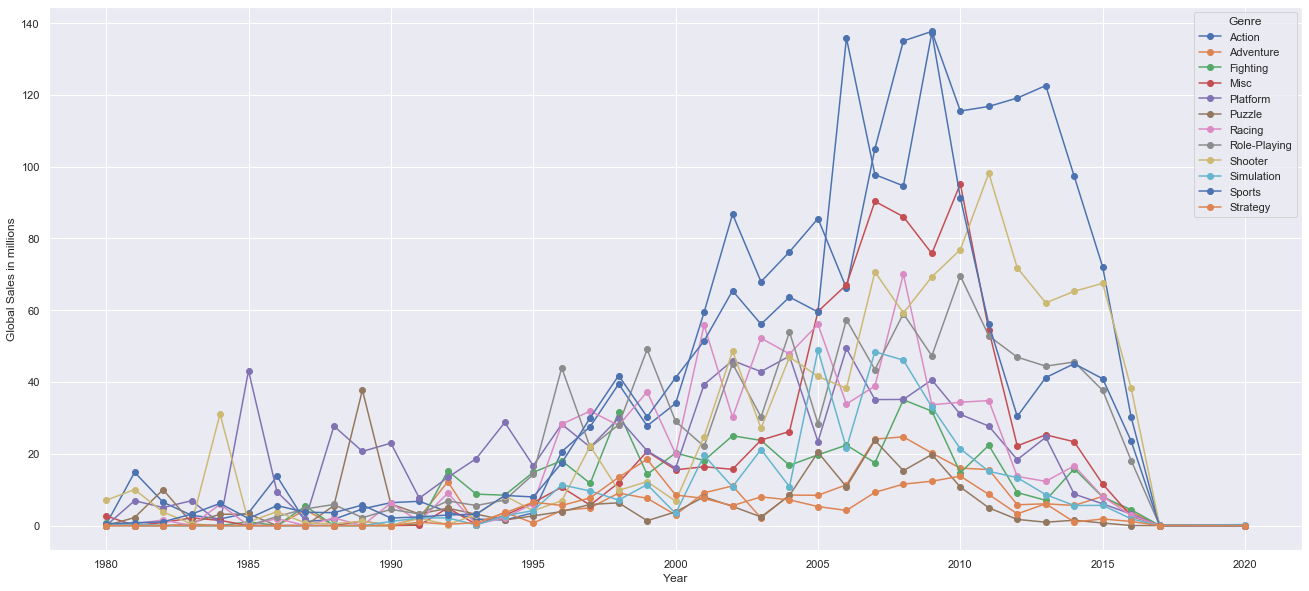

In [30]:
Genre_Sales = gamesSales.groupby(['Year_of_Release','Genre'])['Global_Sales'].aggregate('sum').unstack()
Genre_Sales = Genre_Sales.fillna(0)
plot1 = Genre_Sales.plot(kind='line',figsize = (20, 10), marker='o')
plot1.set(xlabel='Year',ylabel='Global Sales in millions')
plt.show();

## Global Sales Separated by Genre

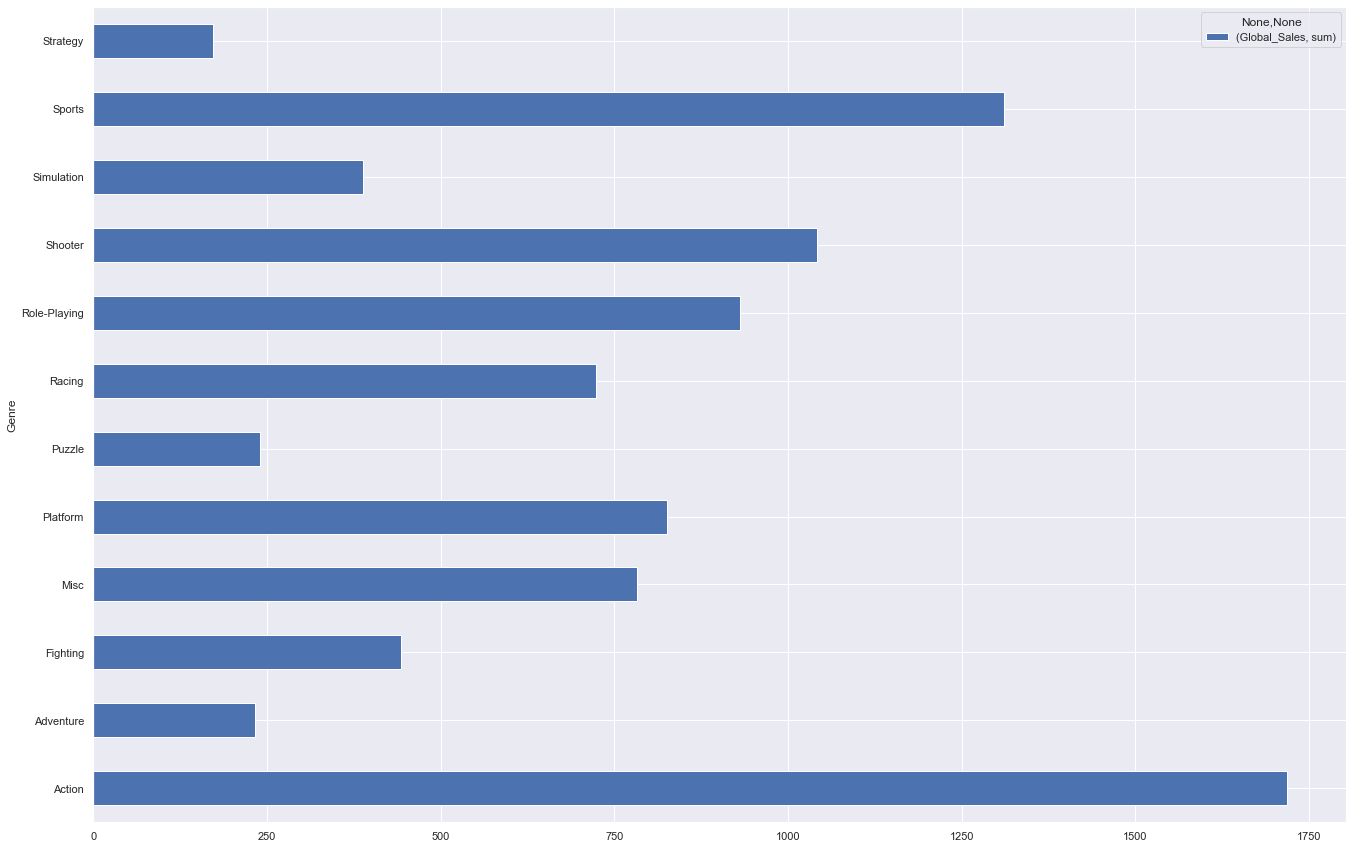

In [24]:
gamesSales.groupby('Genre').agg({'Global_Sales': ['sum'] }).plot(kind='barh',figsize = (20,15));  

## Global Sales by Platform Separated by Genre

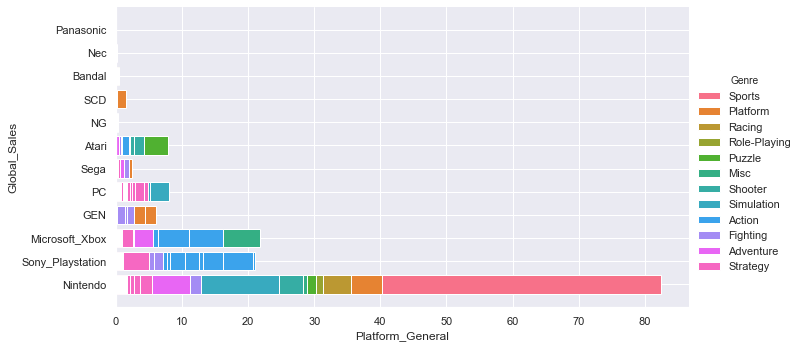

In [29]:
sns.FacetGrid(gamesSales, hue="Genre", height=5, aspect = 2) \
   .map(plt.barh, 'Platform_General', "Global_Sales") \
   .add_legend();

## Global Sales by Platform Separated by Genre

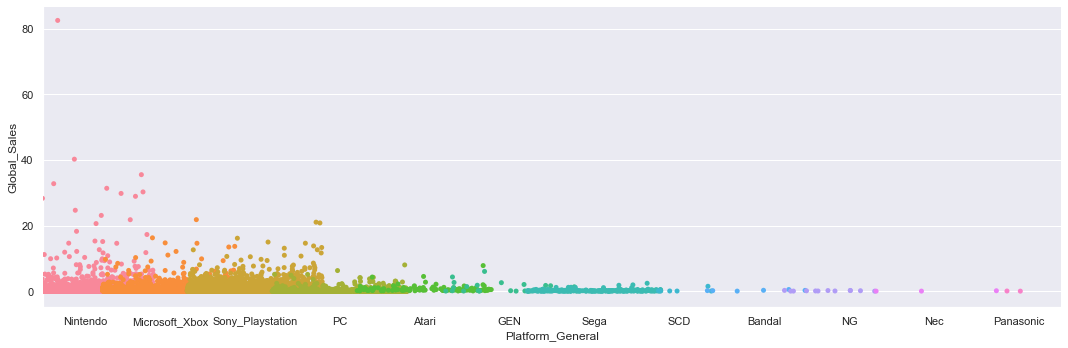

In [30]:
sns.catplot(x='Platform_General', y='Global_Sales', 
            data=gamesSales,jitter='0.8', height= 5, aspect = 3);

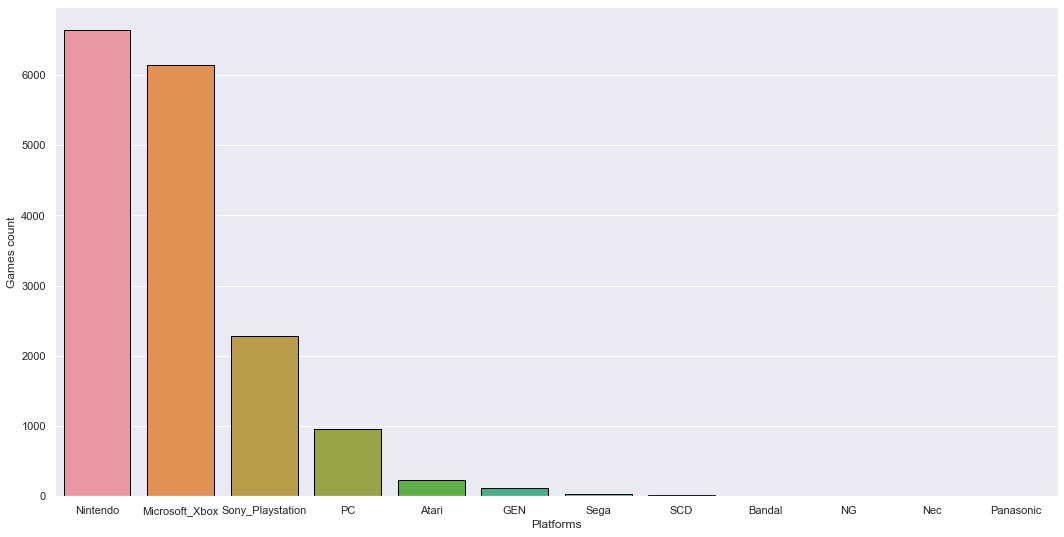

In [32]:
x=gamesSales.Platform_General.unique()
y=gamesSales.Platform_General.value_counts()
plt.figure(figsize=(16,9))
sns.barplot(x=x,y=y,edgecolor="black")
plt.xlabel("Platforms")
plt.ylabel("Games count")
plt.show()

## Total Sales by Year Express by Genre

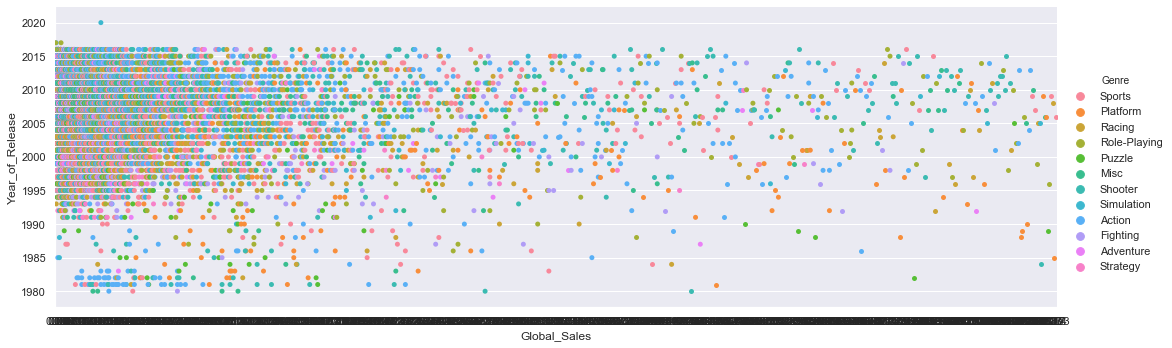

In [49]:
sns.catplot(x="Global_Sales", y="Year_of_Release", hue="Genre", kind="swarm", data=gamesSales, height= 5, aspect = 3);

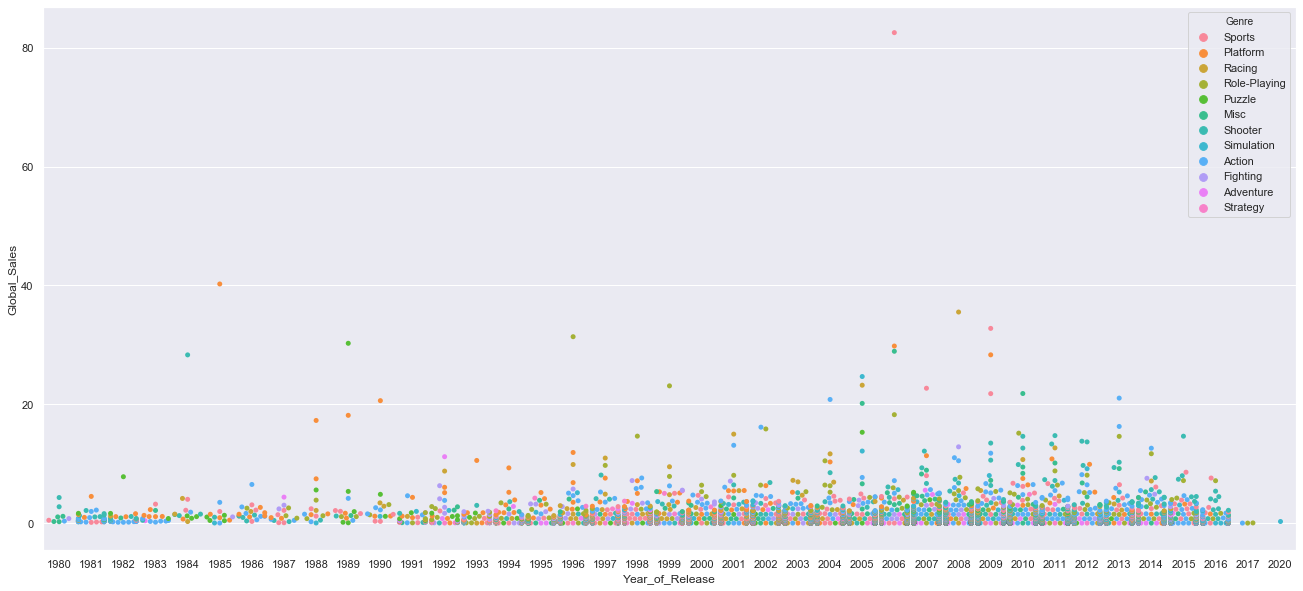

In [48]:
f,ax = plt.subplots(figsize=(20, 10))
sns.swarmplot(x=gamesSales.Year_of_Release, y=gamesSales.Global_Sales,hue=gamesSales.Genre)
plt.show()

In [39]:
trace1 = go.Bar(
    x=gamesSales.groupby('Platform_General')["Global_Sales"].sum().index,
    y=gamesSales.groupby('Platform_General')["Global_Sales"].sum().values,
    opacity=0.75,
    name = "Action",
    marker=dict(color="rgb(119,172,238)"))
trace2 = go.Bar(
    x=gamesSales.groupby('Platform_General')["Global_Sales"].sum().index,
    y=gamesSales.groupby('Platform_General')["Global_Sales"].sum().values,
    opacity=0.75,
    name = "Sports",
    marker=dict(color='rgb(21,90,174)'))
trace3 = go.Bar(
    x=gamesSales.groupby('Platform_General')["Global_Sales"].sum().index,
    y=gamesSales.groupby('Platform_General')["Global_Sales"].sum().values,
    opacity=0.75,
    name = "Racing",
    marker=dict(color="rgb(156,245,163)"))
trace4 = go.Bar(
    x=gamesSales.groupby('Platform_General')["Global_Sales"].sum().index,
    y=gamesSales.groupby('Platform_General')["Global_Sales"].sum().values,
    opacity=0.75,
    name = "Shooter",
    marker=dict(color="rgb(14,135,23)"))
trace5 = go.Bar(
    x=gamesSales.groupby('Platform_General')["Global_Sales"].sum().index,
    y=gamesSales.groupby('Platform_General')["Global_Sales"].sum().values,
    opacity=0.75,
    name = "Misc",
    marker=dict(color='rgb(252,118,103)'))
trace6 = go.Bar(
    x=gamesSales.groupby('Platform_General')["Global_Sales"].sum().index,
    y=gamesSales.groupby('Platform_General')["Global_Sales"].sum().values,
    opacity=0.75,
    name = "Role Playing",
    marker=dict(color="rgb(226,28,5)"))
trace7 = go.Bar(
    x=gamesSales.groupby('Platform_General')["Global_Sales"].sum().index,
    y=gamesSales.groupby('Platform_General')["Global_Sales"].sum().values,
    opacity=0.75,
    name = "Fighting",
    marker=dict(color="rgb(247,173,13)"))
trace8 = go.Bar(
    x=gamesSales.groupby('Platform_General')["Global_Sales"].sum().index,
    y=gamesSales.groupby('Platform_General')["Global_Sales"].sum().values,
    opacity=0.75,
    name = "Platform",
    marker=dict(color="rgb(242,122,13)"))
trace9 = go.Bar(
    x=gamesSales.groupby("Platform")["Global_Sales"].sum().index,
    y=gamesSales.groupby("Platform")["Global_Sales"].sum().values,
    opacity=0.75,
    name = "Simulation",
    marker=dict(color="rgb(188,145,202)"))
trace10 = go.Bar(
    x=gamesSales.groupby('Platform_General')["Global_Sales"].sum().index,
    y=gamesSales.groupby('Platform_General')["Global_Sales"].sum().values,
    opacity=0.75,
    name = "Adventure",
    marker=dict(color='rgb(104,57,119)'))
trace11 = go.Bar(
    x=gamesSales.groupby('Platform_General')["Global_Sales"].sum().index,
    y=gamesSales.groupby('Platform_General')["Global_Sales"].sum().values,
    opacity=0.75,
    name = "Strategy",
    marker=dict(color='rgb(245,253,104)'))
trace12 = go.Bar(
    x=gamesSales.groupby('Platform_General')["Global_Sales"].sum().index,
    y=gamesSales.groupby('Platform_General')["Global_Sales"].sum().values,
    opacity=0.75,
    name = "Puzzle",
    marker=dict(color='rgb(138,72,40)'))

data = [trace1, trace2,trace3,trace4,trace5,trace6,trace7,trace8,trace9,trace10,trace11,trace12]
layout = go.Layout(barmode='stack',
                   title='Total Global Sales According to Platform and Genre',
                   xaxis=dict(title='Platform'),
                   yaxis=dict( title='Global Sales(In Millions)'),
                   paper_bgcolor='beige',
                   plot_bgcolor='beige'
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

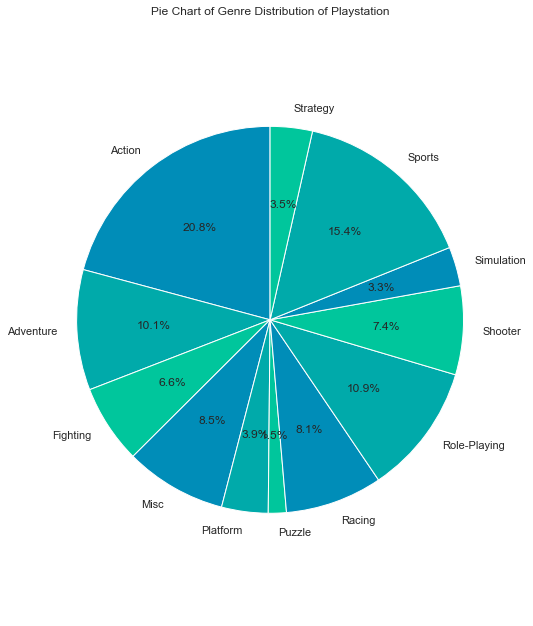

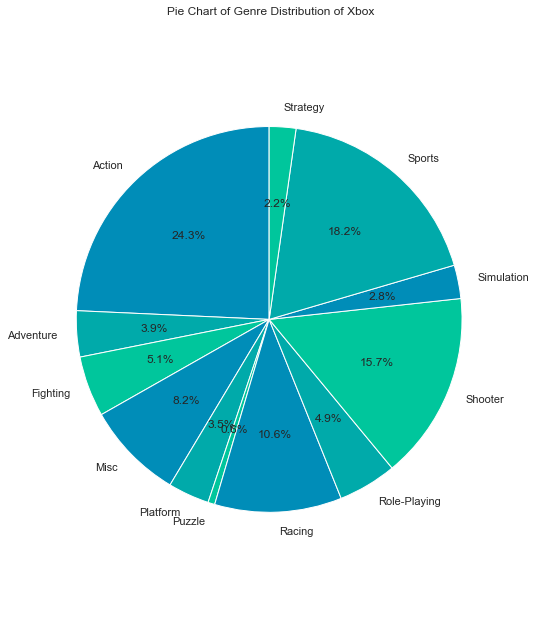

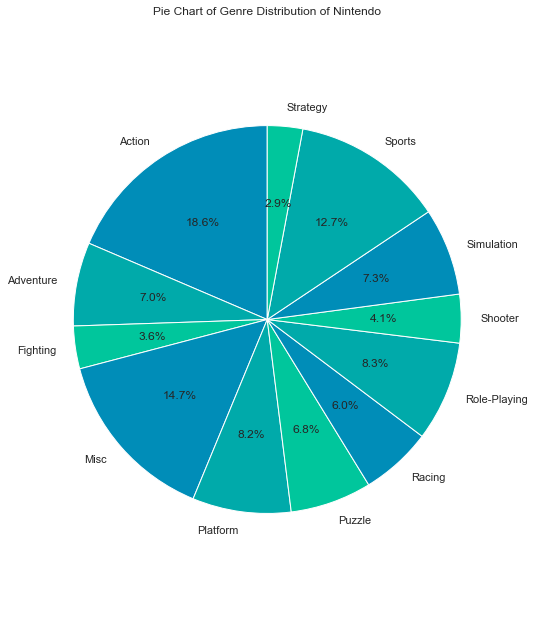

In [47]:
plt.style.use('seaborn-white')
colors = ['#008DB8','#00AAAA','#00C69C']
plt.figure(figsize=(15,11))
plt.subplot(121)
plt.pie(
   gamesSales.loc[(gamesSales['Platform_General']=='Sony_Playstation')].groupby('Genre').dummy_count.sum(),
    # with the labels being platform
    labels=gamesSales.groupby('Genre').dummy_count.sum().index,
    # with no shadows
    shadow=False,
    # stating our colors
    colors=colors,
    # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%'
    )
plt.axis('equal')
plt.title('Pie Chart of Genre Distribution of Playstation')

plt.style.use('seaborn-white')
colors = ['#008DB8','#00AAAA','#00C69C']
plt.figure(figsize=(15,11))
plt.subplot(122)
plt.pie(
   gamesSales[(gamesSales['Platform_General']=='Microsoft_Xbox')].groupby('Genre').dummy_count.sum(),
    # with the labels being platform
    labels=gamesSales.groupby('Genre').dummy_count.sum().index,
    # with no shadows
    shadow=False,
    # stating our colors
    colors=colors,
    # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%'
    )
plt.axis('equal')
plt.title('Pie Chart of Genre Distribution of Xbox')

plt.style.use('seaborn-white')
colors = ['#008DB8','#00AAAA','#00C69C']
plt.figure(figsize=(15,11))
plt.subplot(122)
plt.pie(
   gamesSales[(gamesSales['Platform_General']=='Nintendo')].groupby('Genre').dummy_count.sum(),
    # with the labels being platform
    labels=gamesSales.groupby('Genre').dummy_count.sum().index,
    # with no shadows
    shadow=False,
    # stating our colors
    colors=colors,
    # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%'
    )
plt.axis('equal')
plt.title('Pie Chart of Genre Distribution of Nintendo')
plt.show();

In [19]:
target_col = 'Global_Sales'
feature_cols = ['Year_of_Release',
                'NA_Sales', 'EU_Sales', 'JP_Sales']

X = gamesSales.loc[:,feature_cols]

y = gamesSales.loc[:,target_col]

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

# Splitting both target and features data into a train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 16)

# Creating a linear regression model instance and fitting the training data to it
lr_gamesSales = LinearRegression()
lr_gamesSales.fit(X_train, y_train)
lr_gamesSales.score(X_test, y_test)

# Evaluating the model 
print('Test Data R-Squared:', lr_gamesSales.score(X_test, y_test))       # Comparing test data to null model/finding R-Squared 
print('Training Data R-Squared:', lr_gamesSales.score(X_train, y_train)) # Comparing test data to null model/finding R-Squared 

y_pred = lr_gamesSales.predict(X_test)
print('Test Data RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # Finding RMSE
print ('Test Data MAE:', metrics.mean_absolute_error(y_test, y_pred))         # Finding MAE

Test Data R-Squared: 0.998268132008275
Training Data R-Squared: 0.990616259485546
Test Data RMSE: 0.07784824748937491
Test Data MAE: 0.02542352759004321
